# Introduction

What is Exploratory Data Analysis?

Exploratory Data Analysis or(EDA) is understanding the datasets by summarizing their main characteristcs often plotting them visually.This step is very important especially when we arrive at modeling the data in order to apply Machine learning.Plotting in EDA consists of Histograms,Box plot,Scatter plot and manymore.It often takes much time to explore the data.Through the process of EDA,we understand the problem better and try to uncover hidden insights.


**How to perform Exploratory Analysis?**

The answer is depends on the data set that you are working.There is no one method or common methods to perform EDA.where as in this notebook you can understand some common methods and plots that would be used in EDA process.

# 1. Importing the Required libraries for EDA


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
from bs4 import BeautifulSoup

import re

In [2]:
data_list = []
for i in range(1,40):
    url = 'https://www.flipkart.com/search?q=tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'+str(i)
    page = requests.get(url)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    main_box = soup.find_all('div',{'class':'_3pLy-c row'})
    
    for box in main_box:
        data = {}
        data['Title'] = box.find('div',{'class':'_4rR01T'}).text
        data['Rating'] = box.find('div',{'class':'_3LWZlK'}).text
        data['Application'] = box.find_all('li')[0].text.strip()
        data['Os'] = box.find_all('li')[1].text.strip()
        data['Resolution'] = box.find_all('li')[2].text.strip()
        data['Sound_Output'] = box.find_all('li')[3].text.strip()
        data['Refresh_Rate'] = box.find_all('li')[4].text.strip()
        data['USB'] = box.find_all('li')[5].text.strip()
        data['Price'] = box.find('div',{'class':'_30jeq3 _1_WHN1'}).text.replace('₹','')
        
        data_list.append(data)


'data_list = []\nfor i in range(1,40):\n    url = \'https://www.flipkart.com/search?q=tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off\'+str(i)\n    page = requests.get(url)\n    pagecontent = page.text\n    soup = BeautifulSoup(pagecontent)\n    #box = soup.find_all(\'div\',attrs={\'class\':\'_3pLy-c row\'})\n    #box = soup.find_all(\'div\',attrs={\'class\':\'_4rR01T\'})\n    main_box = soup.find_all(\'div\',{\'class\':\'_3pLy-c row\'})\n    \n    for box in main_box:\n        data = {}\n        data[\'Title\'] = box.find(\'div\',{\'class\':\'_4rR01T\'}).text\n        data[\'Rating\'] = box.find(\'div\',{\'class\':\'_3LWZlK\'}).text\n        data[\'Application\'] = box.find_all(\'li\')[0].text.strip()\n        data[\'Os\'] = box.find_all(\'li\')[1].text.strip()\n        data[\'Resolution\'] = box.find_all(\'li\')[2].text.strip()\n        data[\'Sound_Output\'] = box.find_all(\'li\')[3].text.strip()\n        data[\'Refresh_Rate\'] = box.find_all(\'li\')[4].te

In [3]:

dataset = pd.read_csv(r"C:\Users\Natraj\TV123\project.csv")

In [4]:
dataset

,Unnamed: 0,Brand,Application,Os,Resolution,Sound_Output,Refresh_Rate,USB,Rating,Price,HDMI,Screen_size
0,0,SAMSUNG,Netflix|Disney+Hotstar|Youtube,Tizen,Ultra HD,20,120,2,4.4,98970,4,65 inch
1,1,Mi,Netflix|Prime Video|Disney+Hotstar|Youtube,Android,HD Ready,20,60,2,4.4,16999,3,32 inch
2,2,LG,Netflix|Prime Video|Disney+Hotstar|Youtube,WebOS,HD Ready,10,50,1,4.4,17999,2,32 inch
3,3,Mi,Netflix|Prime Video|Disney+Hotstar|Youtube,Android,Ultra HD,20,60,2,4.3,29999,3,43 inch
4,4,Mi,Netflix|Prime Video|Disney+Hotstar|Youtube,Android,Full HD,20,60,2,4.3,24999,3,40 inch
...,...,...,...,...,...,...,...,...,...,...,...,...
1747,1747,OnePlus,Netflix|Prime Video|Disney+Hotstar|Youtube,Android,Full HD,20,60,2,4.3,29499,2,43 inch
1748,1748,iFFALCON,Netflix|Disney+Hotstar|Youtube,Android,Ultra HD,30,60,2,4.3,36999,3,55 inch
1749,1749,TCL,Netflix|Disney+Hotstar|Youtube,Android,HD Ready,20,60,1,4.2,16499,2,32 inch
1750,1750,SAMSUNG,Netflix|Disney+Hotstar|Youtube,Tizen,Full HD,20,60,1,4.4,32990,2,43 inch


# 1.2 Checking the types of data and basic summary stats

Here we check for the datatypes because sometimes the rating or the price of the tv would be stored as a string.If in that case,we have to convert that string to integer data only then we can plot the data via graph .Here in this case,the data is already in integer format so notthing to worry.



In [5]:
# To display datatype of each column and also display the non-null rows for each column.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1752 non-null   int64  
 1   Brand         1752 non-null   object 
 2   Application   1752 non-null   object 
 3   Os            1752 non-null   object 
 4   Resolution    1752 non-null   object 
 5   Sound_Output  1752 non-null   int64  
 6   Refresh_Rate  1752 non-null   int64  
 7   USB           1752 non-null   int64  
 8   Rating        1752 non-null   float64
 9   Price         1752 non-null   int64  
 10  HDMI          1752 non-null   int64  
 11  Screen_size   1752 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 164.4+ KB


In [6]:
# To display the Summary stats which include count,mean,std,min,max etc
dataset.describe()

,Unnamed: 0,Sound_Output,Refresh_Rate,USB,Rating,Price,HDMI
count,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000
mean,875.500000,21.051370,61.666667,1.808790,4.317922,28579.522260,2.658676
std,505.903153,3.733817,12.475752,0.487973,0.079178,17149.252962,0.555276
min,0.000000,10.000000,50.000000,1.000000,4.100000,13990.000000,2.000000
25%,437.750000,20.000000,60.000000,2.000000,4.300000,17499.000000,2.000000
50%,875.500000,20.000000,60.000000,2.000000,4.300000,24990.000000,3.000000
75%,1313.250000,20.000000,60.000000,2.000000,4.400000,34242.250000,3.000000
max,1751.000000,30.000000,120.000000,3.000000,4.400000,98970.000000,4.000000


In [7]:
# To display how many null values are present in each column
dataset.isnull().sum()

Unnamed: 0      0
Brand           0
Application     0
Os              0
Resolution      0
Sound_Output    0
Refresh_Rate    0
USB             0
Rating          0
Price           0
HDMI            0
Screen_size     0
dtype: int64

# 2. Dropping Irrelevant columns

In [8]:
dataset = dataset.drop(['Unnamed: 0'],axis=1 )


In [9]:
dataset

,Brand,Application,Os,Resolution,Sound_Output,Refresh_Rate,USB,Rating,Price,HDMI,Screen_size
0,SAMSUNG,Netflix|Disney+Hotstar|Youtube,Tizen,Ultra HD,20,120,2,4.4,98970,4,65 inch
1,Mi,Netflix|Prime Video|Disney+Hotstar|Youtube,Android,HD Ready,20,60,2,4.4,16999,3,32 inch
2,LG,Netflix|Prime Video|Disney+Hotstar|Youtube,WebOS,HD Ready,10,50,1,4.4,17999,2,32 inch
3,Mi,Netflix|Prime Video|Disney+Hotstar|Youtube,Android,Ultra HD,20,60,2,4.3,29999,3,43 inch
4,Mi,Netflix|Prime Video|Disney+Hotstar|Youtube,Android,Full HD,20,60,2,4.3,24999,3,40 inch
...,...,...,...,...,...,...,...,...,...,...,...
1747,OnePlus,Netflix|Prime Video|Disney+Hotstar|Youtube,Android,Full HD,20,60,2,4.3,29499,2,43 inch
1748,iFFALCON,Netflix|Disney+Hotstar|Youtube,Android,Ultra HD,30,60,2,4.3,36999,3,55 inch
1749,TCL,Netflix|Disney+Hotstar|Youtube,Android,HD Ready,20,60,1,4.2,16499,2,32 inch
1750,SAMSUNG,Netflix|Disney+Hotstar|Youtube,Tizen,Full HD,20,60,1,4.4,32990,2,43 inch


# 3.Detecting Outliers

An outlier is a points that are different from other points.Sometimes they can be very high or low.It's often a good idea to detect and remove outliers.Because outliers are one of the primary reasons for resulting in a less accurate model.Often outliers can be seen with visualizations using a boxplot.Shown below are the box plot of Rating,Price etc.Herein all the plots,you can find some points are outside the box they are none other than outliers.

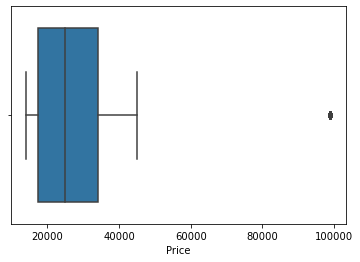

In [10]:
# Boxplot of price column
sns.boxplot(x=dataset['Price']);

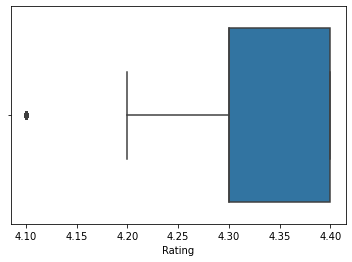

In [11]:
# Boxplot of Rating column
sns.boxplot(x=dataset['Rating']);

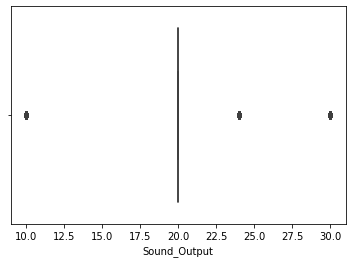

In [12]:
# Boxplot of Sound_Output column
sns.boxplot(x=dataset['Sound_Output']);

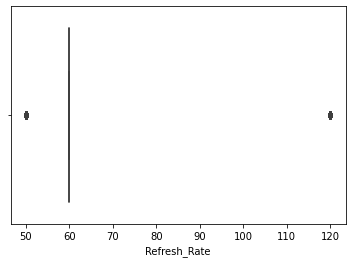

In [13]:
# Boxplot of Refresh_Rate	 column
sns.boxplot(x=dataset['Refresh_Rate']);

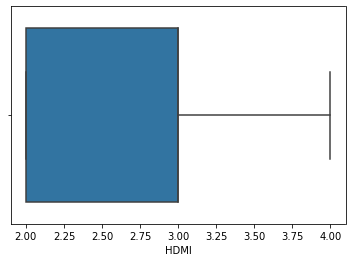

In [14]:
# Boxplot of HDMI	 column
sns.boxplot(x=dataset['HDMI']);

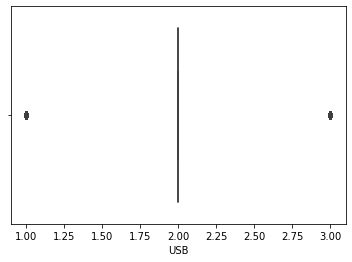

In [15]:
# Boxplot of USB	 column
sns.boxplot(x=dataset['USB']);

In [16]:
# To find the interquantile range of each column
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Sound_Output        0.00
Refresh_Rate        0.00
USB                 0.00
Rating              0.10
Price           16743.25
HDMI                1.00
dtype: float64


# 4.What are the most represented TV brands?


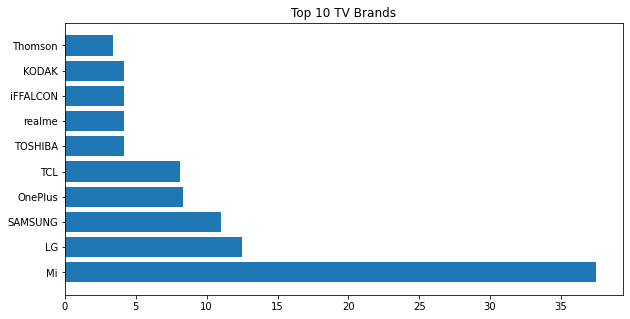

In [17]:
# To display top 10 TV brands
counts = dataset['Brand'].value_counts()* 100/sum(dataset['Brand'].value_counts())
popular_labels = counts.index[:10]
plt.figure(figsize=(10,5))
plt.barh(popular_labels,width=counts[:10])
plt.title('Top 10 TV Brands')
plt.show()

# 4.1 Average price amoung the top TV brands

In [18]:
# To display average price amoung the top TV brands
price = dataset[['Brand','Price']].loc[(dataset['Brand'] == 'SAMSUNG') | (dataset['Brand'] == 'Mi') | (dataset['Brand'] == 'OnePlus') | (dataset['Brand'] == 'Thomson') | (dataset['Brand'] == 'iFFALCON') | (dataset['Brand'] == 'KODAK') | (dataset['Brand'] == 'TOSHIBA') | (dataset['Brand'] == 'realme') | (dataset['Brand'] == 'TCL') | (dataset['Brand'] == 'LG')].groupby('Brand').mean()
price

,Price
Brand,
KODAK,13990.000000
LG,30326.333333
Mi,26832.333333
OnePlus,24249.000000
SAMSUNG,52386.062176
TCL,26009.563380
TOSHIBA,24990.000000
Thomson,14499.000000
iFFALCON,36999.000000


# 5. Correlation matrix

In [19]:
# To display how one variable correlate with other variable
dataset.corr()

,Sound_Output,Refresh_Rate,USB,Rating,Price,HDMI
Sound_Output,1.000000,0.051860,0.339216,-0.102796,0.058361,0.293834
Refresh_Rate,0.051860,1.000000,0.189341,0.138564,0.833056,0.563615
USB,0.339216,0.189341,1.000000,0.013362,0.060020,0.618940
Rating,-0.102796,0.138564,0.013362,1.000000,0.218241,0.187281
Price,0.058361,0.833056,0.060020,0.218241,1.000000,0.448074
HDMI,0.293834,0.563615,0.618940,0.187281,0.448074,1.000000


# 5.1 High anticorrelation  

<AxesSubplot:>

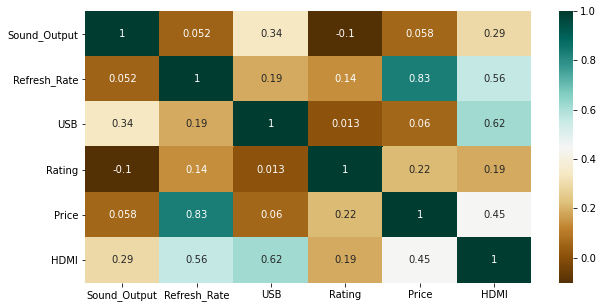

In [20]:
# Displaying the correlation between variable using heatmap
plt.figure(figsize=(10,5))
c = dataset.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

# 6.Plotting Different Graphs

Text(0.5, 0, 'Os')

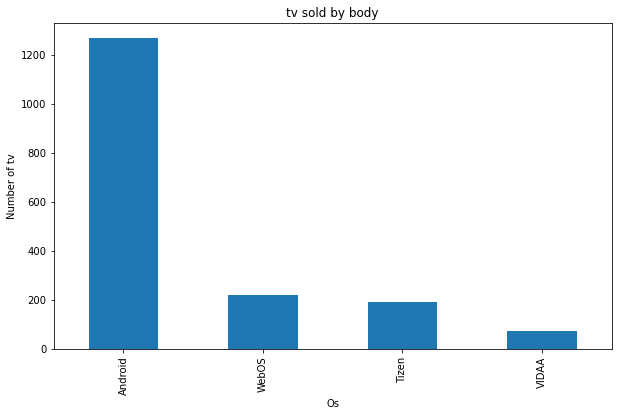

In [21]:
# To display the which Os type tv sold most or least
dataset['Os'].value_counts().plot.bar(figsize=(10,6))
plt.title("tv sold by body")
plt.ylabel("Number of tv")
plt.xlabel("Os")

From the above chart we can see that Android TV sold more

Text(0.5, 0, 'Body size')

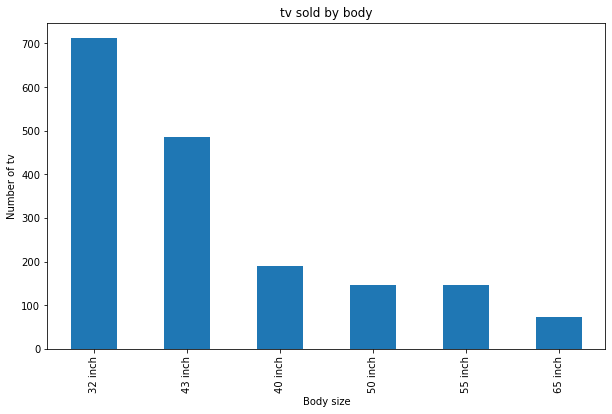

In [23]:
# To display the which size segment tv sold most or least
dataset['Screen_size'].value_counts().plot.bar(figsize=(10,6))
plt.title("tv sold by body")
plt.ylabel("Number of tv")
plt.xlabel("Body size")

From the above chart we can see that 32 inch size TV are sold more

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


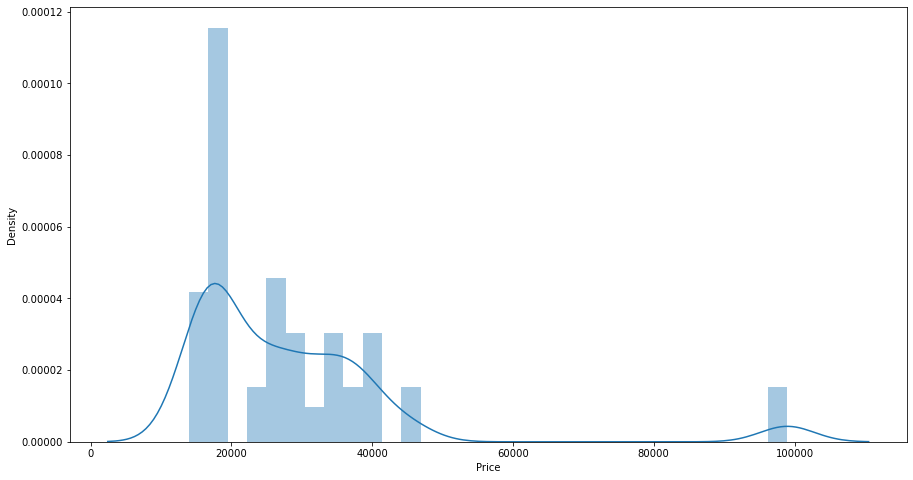

In [24]:
plt.figure(figsize=(15,8))
sns.distplot(dataset['Price'])
plt.show()

From the above Chart we can see that The probability price distribution with its tail on the right side is a positively skewed distribution

Text(0.5, 0, 'Body type')

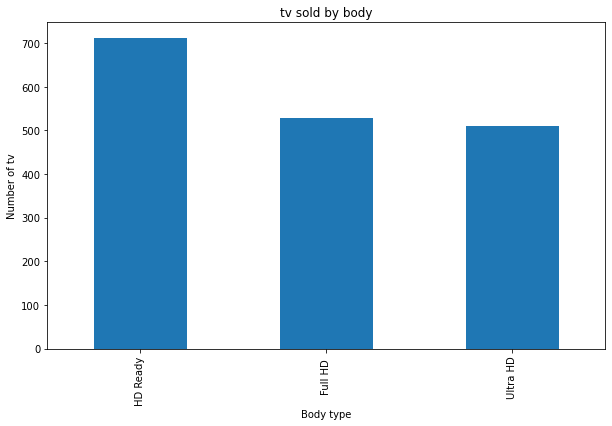

In [25]:
# To display the which Resolution tv sold most or least
dataset['Resolution'].value_counts().plot.bar(figsize=(10,6))
plt.title("tv sold by body")
plt.ylabel("Number of tv")
plt.xlabel("Body type")

From the above chart we can see that HD Ready Resolution TV are sold more

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


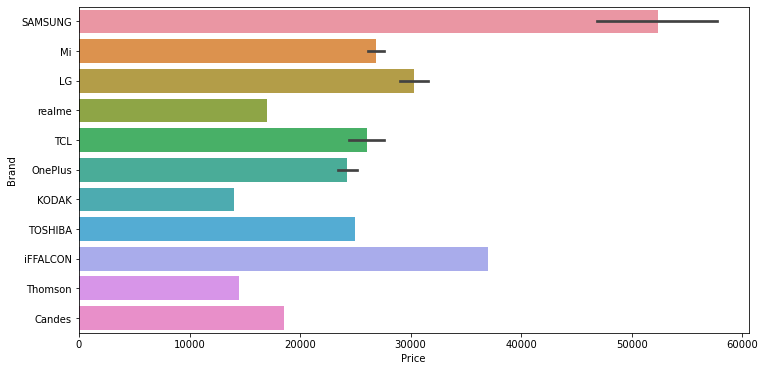

In [26]:
# Plotting price vs rating using barplot
plt.figure(figsize=(12,6))
sns.barplot(dataset['Price'],dataset['Brand']);

From the above chart we can see that SAMSUNG has most expensive TV in the Market 

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


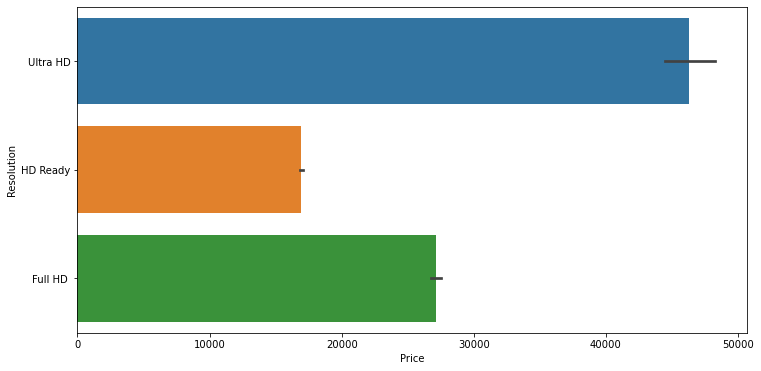

In [27]:
# Plotting price vs Resolution using barplot
plt.figure(figsize=(12,6))
sns.barplot(dataset['Price'],dataset['Resolution']);

From the above chart we can see that Ultra HD TV is the most expensive and HD Ready is the less expensive 

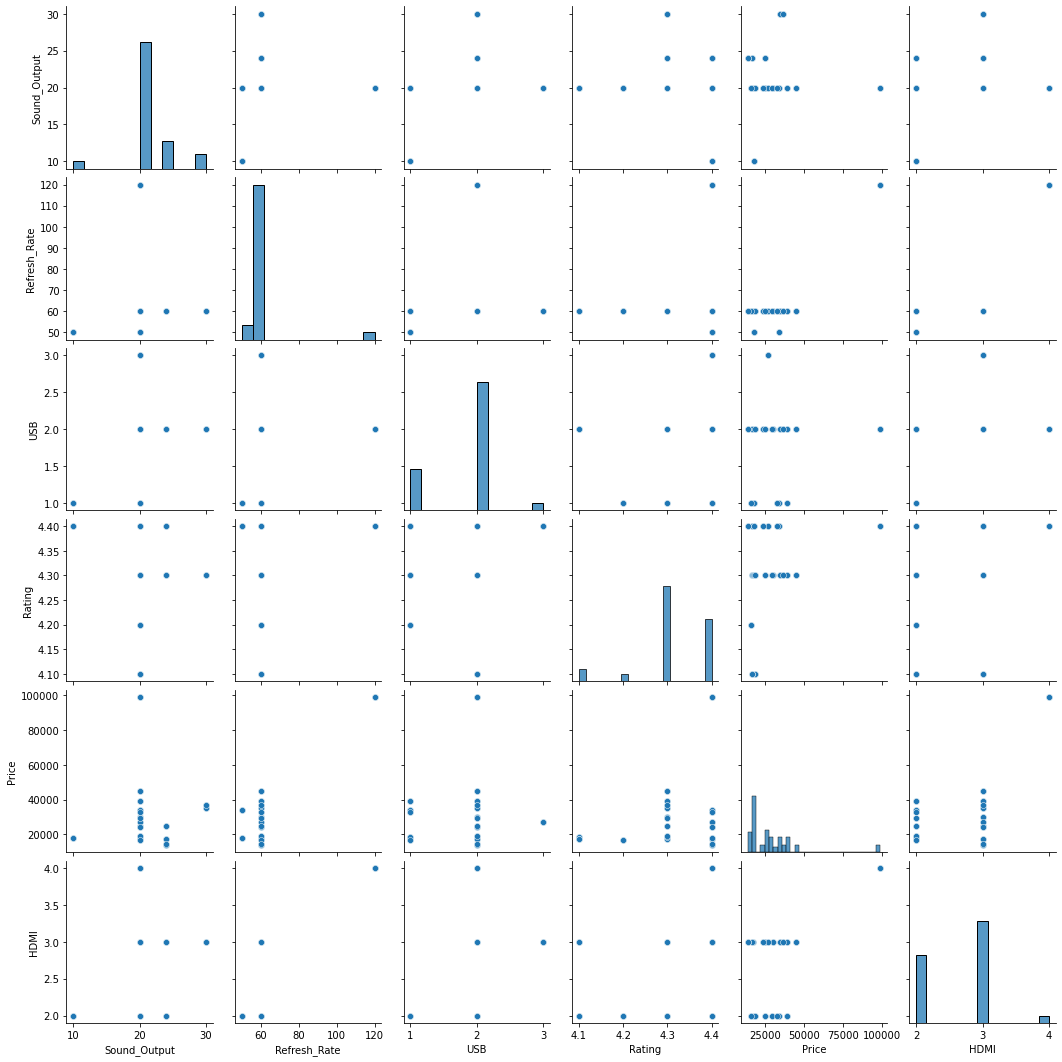

In [28]:
sns.pairplot(dataset)

# 7. Making a New group 'Price_group'

In [31]:
# Create a new column price_group and assign the value based on tv price
dataset['price_group'] = pd.cut(dataset['Price'],[0,20000,40000,60000,80000,100000,600000],labels=['<20K','20-39K','40-59K','60-79K','80-99K','>100K'],include_lowest = True)
dataset['price_group'] =dataset['price_group'].astype(object)

Text(0.5, 0, 'Price Group')

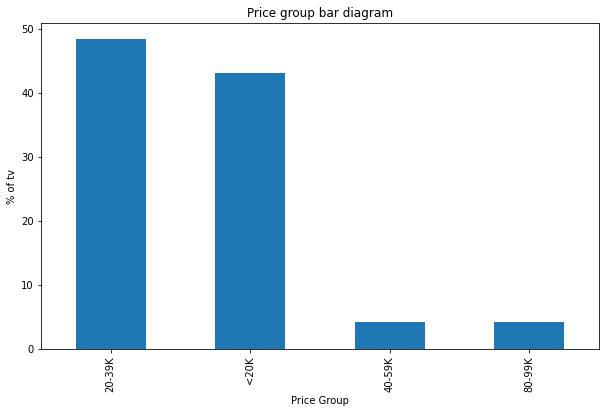

In [30]:
(dataset['price_group'].value_counts() / len(dataset) * 100).plot.bar(figsize=(10,6))
plt.title("Price group bar diagram")
plt.ylabel("% of tv")
plt.xlabel("Price Group")
